In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [10]:
train = pd.read_pickle("./data/train_RFE.pkl")
test = pd.read_pickle("./data/test_RFE.pkl")


train_DL = pd.read_pickle("./data/train_DL_RFE.pkl")
test_DL = pd.read_pickle("./data/test_DL_RFE.pkl")
val_DL = pd.read_pickle("./data/validate_DL_RFE.pkl")

In [8]:
def load_data(train, test):
    train_X = np.array(train.loc[:,~train.columns.isin(['ChEMBL_ID', 'smiles','pIC50'])])
    train_Y = np.array(train.pIC50)
    test_X = np.array(test.loc[:,~test.columns.isin(['ChEMBL_ID', 'smiles','pIC50'])])
    test_Y = np.array(test.pIC50)

    return train_X, train_Y, test_X, test_Y

def load_data_DL(train_DL, test_DL, val_DL):
    train_X = np.array(train_DL.loc[:,~train_DL.columns.isin(['ChEMBL_ID', 'smiles','pIC50'])])
    train_Y = np.array(train_DL.pIC50)
    test_X = np.array(test_DL.loc[:,~test_DL.columns.isin(['ChEMBL_ID', 'smiles','pIC50'])])
    test_Y = np.array(test_DL.pIC50)
    val_X = np.array(val_DL.loc[:,~val_DL.columns.isin(['ChEMBL_ID', 'smiles','pIC50'])])
    val_Y = np.array(val_DL.pIC50)

    return train_X, train_Y, test_X, test_Y, val_X, val_Y

def root_mean_squared_error(test_y, pred_y):
    return np.sqrt(mean_squared_error(test_y, pred_y))

def evaluate(train_Y, pred_Y_train, test_Y, pred_Y_test):
    print("Train Root Mean Squared Error:", root_mean_squared_error(train_Y, pred_Y_train))
    print("Train Mean Absolute Error:", mean_absolute_error(train_Y, pred_Y_train))
    print("Train R2:", r2_score(train_Y, pred_Y_train))
    print('\n')
    print("Test Root Mean Squared Error:", mean_squared_error(test_Y, pred_Y_test))
    print("Test Mean Absolute Error:", mean_absolute_error(test_Y, pred_Y_test))
    print("Test R2:", r2_score(test_Y, pred_Y_test))
    print('\n')

def visualizeTrainTest(train_Y, pred_Y_train, test_Y, pred_Y_test):
    fig, axs = plt.subplots(1,2)
    fig.set_figheight(5)
    fig.set_figwidth(10)

    pred_pairs_train = {key: value for key, value in zip(train_Y, pred_Y_train)}
    # pred_pairs_train = dict(sorted(pred_pairs_train.items()))
    pred_pairs_test = {key: value for key, value in zip(test_Y, pred_Y_test)}
    # pred_pairs_test = dict(sorted(pred_pairs_test.items()))


    axs[0].set_title("Train predictions")
    axs[0].plot(pred_pairs_train.values(), 'o', color="red", label='true data', marker=".", markersize=5)
    axs[0].plot(pred_pairs_train.keys(), color="darkblue", label='predictions')
    axs[0].set_xlabel("Molecules")
    axs[0].set_ylabel("pIC50")
    axs[0].legend()
    axs[0].grid()

    axs[1].set_title("Test predictions")
    axs[1].plot(pred_pairs_test.values(), 'o', color="red", label='true data', marker=".", markersize=5)
    axs[1].plot(pred_pairs_test.keys(), color="darkblue", label='predictions')
    axs[1].set_xlabel("Molecules")
    axs[1].set_ylabel("pIC50")
    axs[1].legend()
    axs[1].grid()

    fig.tight_layout()
    plt.show()

### Random forest

Train Root Mean Squared Error: 0.05323100994266132
Train Mean Absolute Error: 0.04049045415367454
Train R2: 0.9352045273614499


Test Root Mean Squared Error: 0.03277627922241959
Test Mean Absolute Error: 0.14347666555998112
Test R2: 0.3369300969659026




C:\Users\afs\AppData\Local\Temp\ipykernel_1388\3402225866.py:44: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  axs[0].plot(pred_pairs_train.values(), 'o', color="red", label='true data', marker=".", markersize=5)
C:\Users\afs\AppData\Local\Temp\ipykernel_1388\3402225866.py:52: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  axs[1].plot(pred_pairs_test.values(), 'o', color="red", label='true data', marker=".", markersize=5)


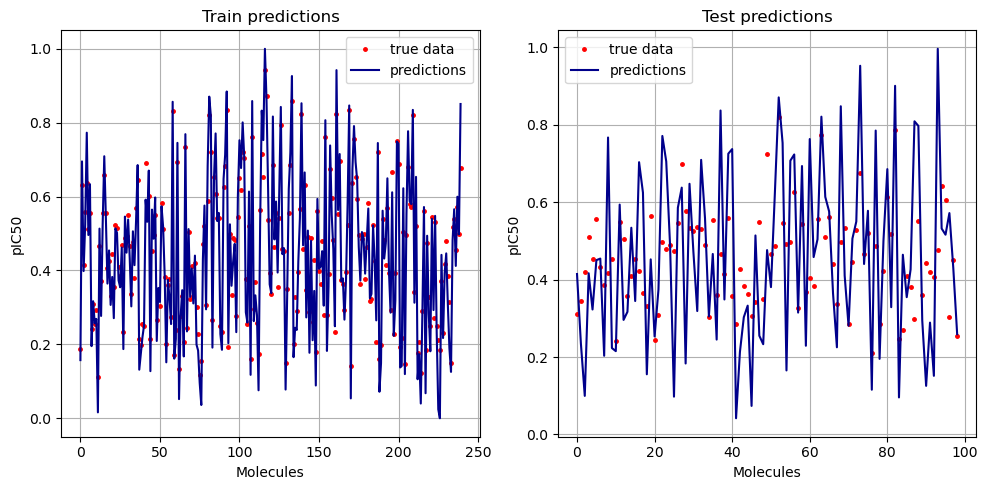

In [11]:
from sklearn.ensemble import RandomForestRegressor

## Fitting

train_X, train_Y, test_X, test_Y,= load_data(train, test)
forest = RandomForestRegressor(random_state=0)
forest.fit(train_X, train_Y)

## Predictions

pred_Y_train_forest = forest.predict(train_X)
pred_Y_test_forest = forest.predict(test_X)
evaluate(train_Y, pred_Y_train_forest, test_Y, pred_Y_test_forest)

## Visualization

visualizeTrainTest(train_Y, pred_Y_train_forest, test_Y, pred_Y_test_forest)


AATS4v 0.03097864002811366
AATS4i 0.02409264907215575
ATSC8c 0.02082440896009945
ATSC5v 0.025851419254014792
ATSC4se 0.017761563150457384
ATSC6se 0.11309418485221844
AATSC0d 0.015166140323000479
GATS2c 0.07121863680281941
GATS3c 0.024743846890560767
GATS6c 0.017801243985352738
GATS6dv 0.019862265493708578
GATS1Z 0.013588197562925262
GATS6se 0.03238068153720115
PNSA1 0.0380679383238956
PNSA2 0.037309292798809374
RNCS 0.026502658196151767
AXp-1d 0.021064224810073983
AXp-2d 0.015205396661134246
SsssN 0.018779374081519667
GeomShapeIndex 0.018350868926785033
IC2 0.018898954011860297
IC3 0.019922231026387526
CIC3 0.04823377742725223
FilterItLogS 0.029498556427076363
PEOE_VSA9 0.016323728738008258
SlogP_VSA3 0.08443069753783197
VSA_EState4 0.03179345311450479
VSA_EState8 0.04395741238325719
GGI8 0.02976984729071605
JGI2 0.040407029873848616
JGI3 0.015449247719943668
JGI5 0.018671432738315494


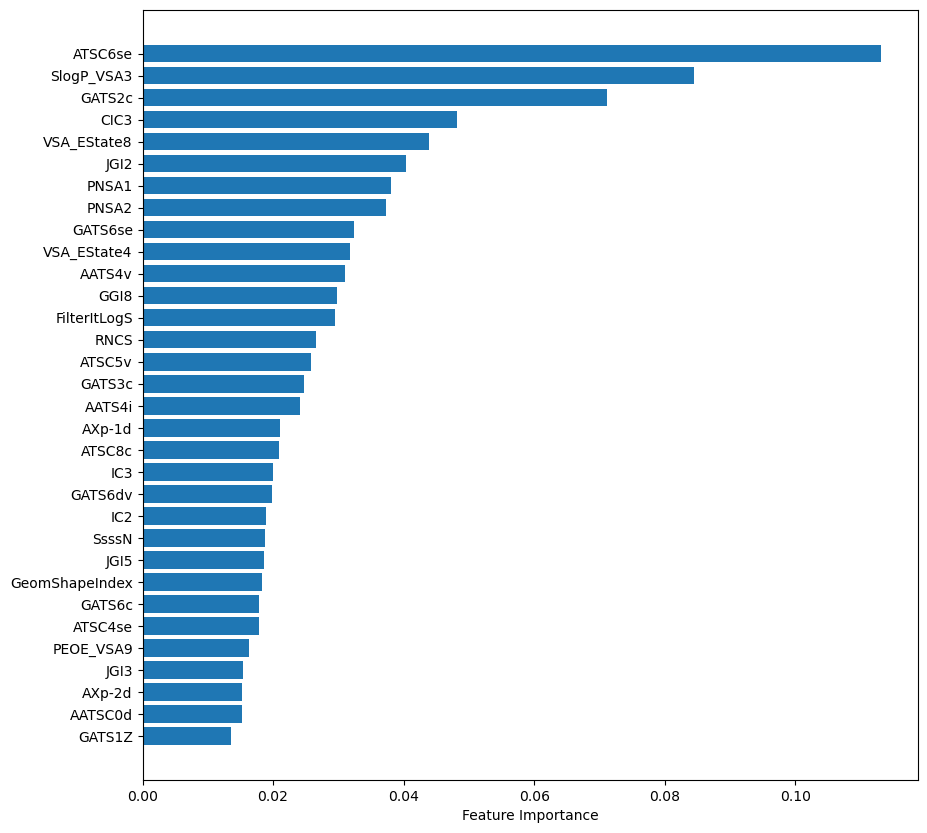

In [12]:
for feature, importance in zip(np.array(train_DL.loc[:,~train.columns.isin(['ChEMBL_ID', 'smiles','pIC50'])].columns), forest.feature_importances_):    
    print(feature, importance)

forest_sort = forest.feature_importances_.argsort()

plt.figure(figsize=(10,10))
plt.barh(np.array(train_DL.loc[:,~train.columns.isin(['ChEMBL_ID', 'smiles','pIC50'])].columns)[forest_sort], 
         forest.feature_importances_[forest_sort])
# plt.rcParams['font.size'] = 3
plt.xlabel("Feature Importance")
plt.show()

## SVM

Train Root Mean Squared Error: 0.10464489718745476
Train Mean Absolute Error: 0.08637352467858213
Train R2: 0.7495901769840612


Test Root Mean Squared Error: 0.033782157723185484
Test Mean Absolute Error: 0.1474659052455871
Test R2: 0.31658099768465453




C:\Users\afs\AppData\Local\Temp\ipykernel_1388\3402225866.py:44: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  axs[0].plot(pred_pairs_train.values(), 'o', color="red", label='true data', marker=".", markersize=5)
C:\Users\afs\AppData\Local\Temp\ipykernel_1388\3402225866.py:52: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  axs[1].plot(pred_pairs_test.values(), 'o', color="red", label='true data', marker=".", markersize=5)


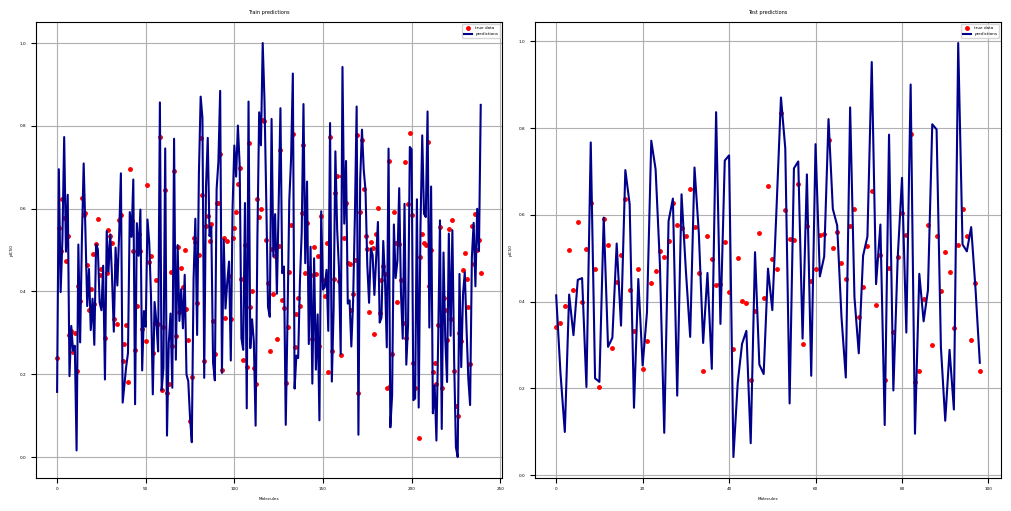

In [13]:
from sklearn.svm import SVR

rain_X, train_Y, test_X, test_Y = load_data(train, test)

## Fitting

svm = SVR()
svm.fit(train_X, train_Y)

## Predictions

pred_Y_train_svm = svm.predict(train_X)
pred_Y_test_svm = svm.predict(test_X)
evaluate(train_Y, pred_Y_train_svm, test_Y, pred_Y_test_svm)

## Visualization

visualizeTrainTest(train_Y, pred_Y_train_svm, test_Y, pred_Y_test_svm)

### DNN

In [18]:
from keras.models import Sequential
from keras.layers import Dense

train_X, train_Y, test_X, test_Y = load_data(train, test)

## Building the model

DNN = Sequential()
DNN.add(Dense(128, kernel_initializer='normal', input_dim = train_X.shape[1], activation='relu'))
DNN.add(Dense(256, kernel_initializer='normal',activation='relu'))
DNN.add(Dense(128, kernel_initializer='normal',activation='relu'))
DNN.add(Dense(1, kernel_initializer='normal',activation='linear'))

## Compiling

DNN.compile(loss='mse', optimizer='adam', metrics=['mse'])
DNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               4224      
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 70273 (274.50 KB)
Trainable params: 70273 (274.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
from sklearn.model_selection import  KFold
avg_train_loss = []
avg_val_loss = []


N_EPOCHS = 200

for n_epoch in range(N_EPOCHS):
    print('\nEPOCH ', n_epoch+1, '-----------------------------------------------------------------------')
    folds = list(KFold(n_splits=5, shuffle=True, random_state=0).split(train_X, train_Y))
    train_loss = []; train_acc = []
    val_loss = []; val_acc = []

    for j, (train_idx, val_idx) in enumerate(folds):
        print('\nEpoch ', n_epoch, 'Fold ',j)
        X_train_cv = train_X[train_idx]
        y_train_cv = train_Y[train_idx]
        X_valid_cv = train_X[val_idx]
        y_valid_cv = train_Y[val_idx]

        DNN.fit(X_train_cv, y_train_cv, batch_size=128, epochs=1, validation_data=(X_valid_cv, y_valid_cv))
        train_loss.append(DNN.history.history['loss'])
        val_loss.append(DNN.history.history['val_loss'])
    
    avg_train_loss.append(np.average(train_loss))
    avg_val_loss.append(np.average(val_loss))
    print(f'Epoch {n_epoch} - val_loss: {avg_val_loss[-1]}\n')


EPOCH  1 -----------------------------------------------------------------------

Epoch  0 Fold  0
3/3 [==============================] - 1s 61ms/step - loss: 0.1937 - mse: 0.1937 - val_loss: 0.1303 - val_mse: 0.1303

Epoch  0 Fold  1
3/3 [==============================] - 0s 29ms/step - loss: 0.0971 - mse: 0.0971 - val_loss: 0.0526 - val_mse: 0.0526

Epoch  0 Fold  2
3/3 [==============================] - 0s 30ms/step - loss: 0.0442 - mse: 0.0442 - val_loss: 0.0641 - val_mse: 0.0641

Epoch  0 Fold  3
3/3 [==============================] - 0s 27ms/step - loss: 0.0653 - mse: 0.0653 - val_loss: 0.0559 - val_mse: 0.0559

Epoch  0 Fold  4
3/3 [==============================] - 0s 26ms/step - loss: 0.0479 - mse: 0.0479 - val_loss: 0.0401 - val_mse: 0.0401
Epoch 0 - val_loss: 0.06860166490077972


EPOCH  2 -----------------------------------------------------------------------

Epoch  1 Fold  0
3/3 [==============================] - 0s 26ms/step - loss: 0.0405 - mse: 0.0405 - val_loss: 0.05

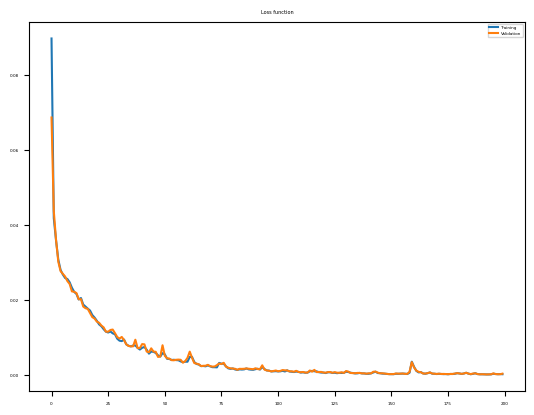

In [20]:
plt.plot(avg_train_loss, label='Training')
plt.plot(avg_val_loss, label='Validation')
plt.title('Loss function')
plt.legend()
plt.show()

4/4 [==============================] - 0s 1ms/step
Train Root Mean Squared Error: 0.025037949876023567
Train Mean Absolute Error: 0.01945188590073602
Train R2: 0.9856645021030953


Test Root Mean Squared Error: 0.03209239314980812
Test Mean Absolute Error: 0.14301455505835423
Test R2: 0.35076523269853566




C:\Users\afs\AppData\Local\Temp\ipykernel_1388\3402225866.py:44: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  axs[0].plot(pred_pairs_train.values(), 'o', color="red", label='true data', marker=".", markersize=5)
C:\Users\afs\AppData\Local\Temp\ipykernel_1388\3402225866.py:52: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  axs[1].plot(pred_pairs_test.values(), 'o', color="red", label='true data', marker=".", markersize=5)


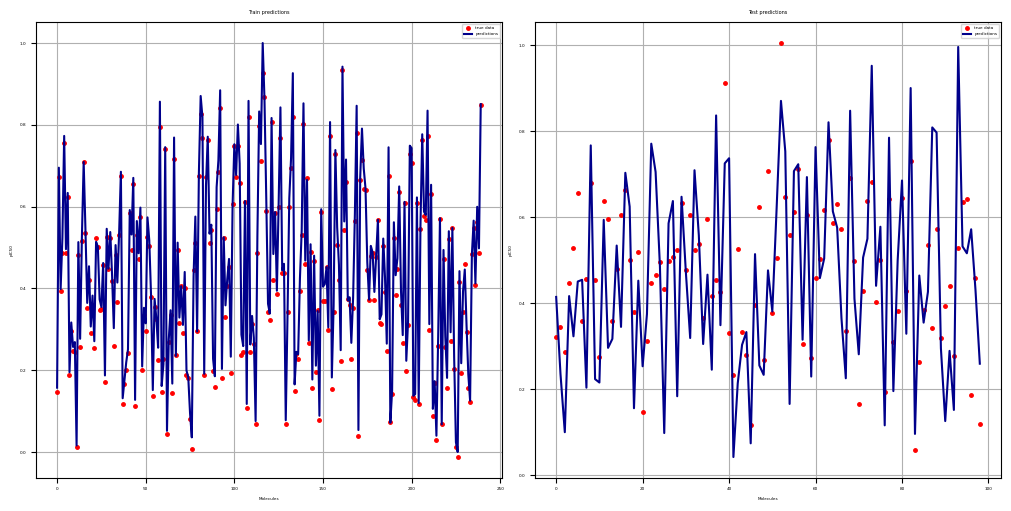

In [21]:
pred_Y_train_dnn = DNN.predict(train_X)
pred_Y_test_dnn = DNN.predict(test_X)
evaluate(train_Y, pred_Y_train_dnn, test_Y, pred_Y_test_dnn)
visualizeTrainTest(train_Y, pred_Y_train_dnn, test_Y, pred_Y_test_dnn)